**Instituto de Informática - UFG**

**Disciplina: Computação paralela 2020/1**

**Professor: Wellington Santos Martins**

**Aluno: Victor Alexandre de Carvalho Coelho**


#Especificação do trabalho


**Descrição:** O objetivo deste trabalho é de prover, detalhadamente, a implementação de um detector de bordas usando abordagens distintas, e também, fazer comparações entre elas a fim de se identificar qual abordagem possui melhor desempenho (speedup). Este trabalho possui como inspiração o artigo de [[Jain et al. 2016]](https://https://ieeexplore.ieee.org/document/7509360).


Para o paralelismo usaremos CUDA/C++ e o código será executado na GPU disponível no ambiente do google colab. Será usado também o OpenCV/C++ para o manuseamento das imagens.


**Resumo da minha abordagem:** Irei comparar minhas duas implementações paralelas, para a detecção de bordas, com a implementação sequencial feita usando as funções do OpenCV. A principal diferença entre as abordagens paralelas, é que, na segunda, as imagens intermediárias não são retornadas para a CPU.

#Primeiro passo

Vamos ativar a GPU para podermos executar o nossos códigos paralelos. 

**Runtime->Change runtime type->Hardware accelerator->GPU**

Observação: Lembre-se de rodar as células do google colab em sequência.

Importe a imagem **"image.jpg"** disponibilizada no arquivo zip, em conjunto com este documento, ou qualquer outra imagem, desde que ela seja renomeada para **"image.jpg"**.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image.jpg to image.jpg


Agora importe todos os arquivos da pasta **"results"**. Observação: É possível selecionar todos os arquivos de uma vez só. 

Esses são os resultados obtidos após uma bateria de testes. É necessário importá-los, pois, iremos plotar eles em gráficos no final deste notebook.

In [ ]:
uploaded = files.upload()

Saving parallelTime-Image1.txt to parallelTime-Image1.txt
Saving parallelTime-Image1-Abordagem2.txt to parallelTime-Image1-Abordagem2.txt
Saving parallelTime-Image2.txt to parallelTime-Image2.txt
Saving parallelTime-Image2-Abordagem2.txt to parallelTime-Image2-Abordagem2.txt
Saving parallelTime-Image3.txt to parallelTime-Image3.txt
Saving parallelTime-Image3-Abordagem2.txt to parallelTime-Image3-Abordagem2.txt
Saving parallelTime-Image4.txt to parallelTime-Image4.txt
Saving parallelTime-Image4-Abordagem2.txt to parallelTime-Image4-Abordagem2.txt
Saving parallelTime-Image5.txt to parallelTime-Image5.txt
Saving parallelTime-Image5-Abordagem2.txt to parallelTime-Image5-Abordagem2.txt
Saving parallelTime-Image6.txt to parallelTime-Image6.txt
Saving parallelTime-Image6-Abordagem2.txt to parallelTime-Image6-Abordagem2.txt
Saving parallelTime-Image7.txt to parallelTime-Image7.txt
Saving parallelTime-Image7-Abordagem2.txt to parallelTime-Image7-Abordagem2.txt
Saving parallelTime-Image8.txt to 

In [ ]:
#Detalhes da placa de vídeo
!nvidia-smi

Tue Oct  6 02:01:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Comando para ver as configurações da CPU
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.172
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	:

In [ ]:
#Comando para ver as configurações da Memória RAM
!cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:        10891624 kB
MemAvailable:   12557260 kB
Buffers:           73760 kB
Cached:          1742412 kB
SwapCached:            0 kB
Active:           638476 kB
Inactive:        1557552 kB
Active(anon):     349572 kB
Inactive(anon):      332 kB
Active(file):     288904 kB
Inactive(file):  1557220 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               220 kB
Writeback:             0 kB
AnonPages:        379800 kB
Mapped:           178652 kB
Shmem:               928 kB
Slab:             157772 kB
SReclaimable:     120720 kB
SUnreclaim:        37052 kB
KernelStack:        3520 kB
PageTables:         4944 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    2463364 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              928 kB
AnonHugePages:   

In [ ]:
#Versão da distribuição
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [ ]:
#Detalhes do compilador de cuda
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [1]:
#Detalhes da versão dos pacotes do OpenCV
!dpkg -l | grep libopencv

ii  libopencv-calib3d-dev:amd64            3.2.0+dfsg-4ubuntu0.1                 amd64        development files for libopencv-calib3d3.2
ii  libopencv-calib3d3.2:amd64             3.2.0+dfsg-4ubuntu0.1                 amd64        computer vision Camera Calibration library
ii  libopencv-contrib-dev:amd64            3.2.0+dfsg-4ubuntu0.1                 amd64        development files for libopencv-contrib3.2
ii  libopencv-contrib3.2:amd64             3.2.0+dfsg-4ubuntu0.1                 amd64        computer vision contrlib library
ii  libopencv-core-dev:amd64               3.2.0+dfsg-4ubuntu0.1                 amd64        development files for libopencv-core3.2
ii  libopencv-core3.2:amd64                3.2.0+dfsg-4ubuntu0.1                 amd64        computer vision core library
ii  libopencv-dev                          3.2.0+dfsg-4ubuntu0.1                 amd64        development files for opencv
ii  libopencv-features2d-dev:amd64         3.2.0+dfsg-4ubuntu0.1                 a

#Utils - Algumas funções auxiliares

In [ ]:
%matplotlib inline
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt


#Return array filled with values from the read file
def readValuesFromFile(filename):
    results = []
    with open(filename, "r") as file1:
        for line in file1.readlines():
            results = [float(i) for i in line.split(" ") if i.strip()]
    return results    

#Print the inicial image and the final result
def showImages(imageName):    
    imagem_inicial = cv.imread(imageName)
    parallel = cv.imread('parallelSobel.jpg')
    sequential = cv.imread('sequentialSobel.jpg')

    if imagem_inicial is None:
        print('Por favor, faça o upload de uma imagem nomeada como "image.jpg", ou passe como parametro para esta função o nome da imagem que você upou')
    else:
        print(" Imagem inicial - Resolução %dx%d" % (imagem_inicial.shape[0],imagem_inicial.shape[1]))
        plt.imshow(imagem_inicial)
        plt.show()

    if parallel is not None:
        print(" Imagem final - GPU")
        plt.imshow(parallel)
        plt.show()

    if sequential is not None:
        print(" Imagem final - CPU")
        plt.imshow(sequential)
        plt.show()

#Código sequencial C++:

Observação: Não há problemas em rodar o código sequencial com a GPU ativada.


In [ ]:
%%writefile sequential.cpp
#include "opencv2/imgproc.hpp"
#include "opencv2/imgcodecs.hpp"
#include "opencv2/highgui.hpp"
#include <opencv2/core/utility.hpp>

using namespace cv;

int main( int, char** argv ){
    Mat src, src_gray;
    Mat grad;

    int scale = 1;
    int delta = 0;
    int ddepth = CV_16S;
    
    int experimentsNumber = 21;
    int64 time;
    src = imread("image.jpg");   

    if( src.empty() )
        { return -1; }

    for(int i = 0; i < experimentsNumber; i++){       
        //Remove noise  
        //GaussianBlur( src, src, Size(3,3), 0, 0, BORDER_DEFAULT );

        //Start clock
        time = getTickCount();

        //Convert to gray
        cvtColor( src, src_gray, COLOR_BGR2GRAY );
        
        Mat grad_x, grad_y;
        Mat abs_grad_x, abs_grad_y;
        
        Sobel( src_gray, grad_x, ddepth, 1, 0, 3, scale, delta, BORDER_DEFAULT );
        Sobel( src_gray, grad_y, ddepth, 0, 1, 3, scale, delta, BORDER_DEFAULT );

        //Computes intermediary gradients gx and gy
        convertScaleAbs( grad_x, abs_grad_x );
        convertScaleAbs( grad_y, abs_grad_y );

        //Computes final gradient
        addWeighted( abs_grad_x, 0.5, abs_grad_y, 0.5, 0, grad );
        
        //End clock
        time = getTickCount() - time;
        printf("Sequential execution time = %g ms\n", time*1000/getTickFrequency()); 

        imwrite("sequentialSobel.jpg", grad); 

        //Ignore first execution, because it is an outlier and will affect the results  
        if(i == 0){}
        else{
            //Writing results on file for latter processing
            FILE * pFile;
            pFile = fopen("sequentialTime-test.txt", "a"); 
            fprintf(pFile, " %g", time*1000/getTickFrequency());
            fclose(pFile);
        }
    }
    return 0;
}

Overwriting sequential.cpp


O comando abaixo irá compilar e executar o código (C++), de nossa implementação sequencial, acima. **Observação**: Não se esqueça de upar para este colab uma imagem nomeada "**image.jpg**", pois ela é essencial para os passos seguintes. 

In [ ]:
!g++ sequential.cpp -o sequential `pkg-config --cflags --libs opencv` && ./sequential

Sequential execution time = 169.005 ms
Sequential execution time = 5.42604 ms
Sequential execution time = 5.22621 ms
Sequential execution time = 5.09574 ms
Sequential execution time = 5.14353 ms
Sequential execution time = 7.78903 ms
Sequential execution time = 5.49736 ms
Sequential execution time = 5.17732 ms
Sequential execution time = 5.29485 ms
Sequential execution time = 5.24083 ms
Sequential execution time = 5.59274 ms
Sequential execution time = 5.63084 ms
Sequential execution time = 5.17998 ms
Sequential execution time = 5.26344 ms
Sequential execution time = 5.1666 ms
Sequential execution time = 5.20048 ms
Sequential execution time = 5.15942 ms
Sequential execution time = 5.31492 ms
Sequential execution time = 5.13235 ms
Sequential execution time = 5.21786 ms
Sequential execution time = 5.18717 ms


 Imagem inicial - Resolução 1071x1080


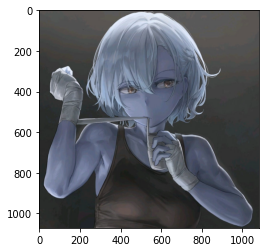

 Imagem final - CPU


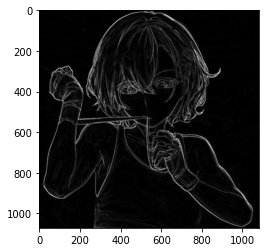

In [ ]:
showImages("image.jpg")

#Código Paralelo Cuda, primeira abordagem.

Abordagem utilizada: "Naive". Neste código estamos processando cada pixel em uma thread diferente. Além disso, estamos retornando os dados intermediários para a CPU. Por exemplo, a imagem que foi convertida em escala de cinza é uma imagem intermediária. E, nós estamos retornando ela para a CPU antes de iniciar a aplicação a convolução com o kernel de Scharr: 

![Scharr filter](https://cdn.discordapp.com/attachments/454743706306609152/762796587520753713/unknown.png)



Os eventos ocorrem da seguinte maneira:

1- CPU recebe imagem inicial.

2- Copiamos essa imagem para a GPU.

3- Alocamos memória para a imagem em escala de cinza.

4- Fazemos a conversão para escala de cinza.

5- Retornamos a imagem em escala de cinza para a CPU.

6- Enviamos ela novamente para a GPU.

7- Alocamos memória para a imagem gradiente.

8- Fazemos o cálculo da imagem gradiente.

9- Copiamos a imagem gradiente de volta para a CPU. 



**Observação**: Se a GPU não estiver ativada o código abaixo não irá funcionar.

In [ ]:
%%writefile parallel.cu
#include<iostream>
#include<cmath>
#include<opencv2/imgproc/imgproc.hpp>
#include<opencv2/highgui/highgui.hpp>
#include<cstdio>
#include<cuda_runtime.h>

using namespace std;
using namespace cv;

//using std::cout;
//using std::endl;

int blocksTest = 16;

static inline void _safe_cuda_call(cudaError err, const char* msg, const char* file_name, const int line_number)
{
	if(err!=cudaSuccess)
	{
		fprintf(stderr,"%s\n\nFile: %s\n\nLine Number: %d\n\nReason: %s\n",msg,file_name,line_number,cudaGetErrorString(err));
		std::cin.get();
		exit(EXIT_FAILURE);
	}
}

#define SAFE_CALL(call,msg) _safe_cuda_call((call),(msg),__FILE__,__LINE__)


__global__ void bgr_to_gray_kernel( unsigned char* input, 
									unsigned char* output, 
									int width,
									int height,
									int colorWidthStep,
									int grayWidthStep)
{
	//2D Index of current thread
	const int xIndex = blockIdx.x * blockDim.x + threadIdx.x;
	const int yIndex = blockIdx.y * blockDim.y + threadIdx.y;

	//Only valid threads perform memory I/O
	if((xIndex<width) && (yIndex<height))
	{
		//Location of colored pixel in input
		const int color_tid = yIndex * colorWidthStep + (3 * xIndex);
		
		//Location of gray pixel in output
		const int gray_tid  = yIndex * grayWidthStep + xIndex;

		const unsigned char blue	= input[color_tid];
		const unsigned char green	= input[color_tid + 1];
		const unsigned char red		= input[color_tid + 2];

        //Equation of gray convertion
		const float gray = red * 0.2989f + green * 0.5870f + blue * 0.1140f;

		output[gray_tid] = static_cast<unsigned char>(gray);
	}
}

void convert_to_gray_wrapper(const cv::Mat& input, cv::Mat& output){

	//Calculate total number of bytes of input and output image
	const int colorBytes = input.step * input.rows;
	const int grayBytes = output.step * output.rows;

	unsigned char *d_input, *d_output;

	//Allocate device memory
	SAFE_CALL(cudaMalloc<unsigned char>(&d_input,colorBytes),"CUDA Malloc Failed");
	SAFE_CALL(cudaMalloc<unsigned char>(&d_output,grayBytes),"CUDA Malloc Failed");

	//Copy data from OpenCV input image to device memory
	SAFE_CALL(cudaMemcpy(d_input,input.ptr(),colorBytes,cudaMemcpyHostToDevice),"CUDA Memcpy Host To Device Failed");

	//Specify a reasonable block size
	const dim3 block(blocksTest,blocksTest);

	//Calculate grid size to cover the whole image
	const dim3 grid((input.cols + block.x - 1)/block.x, (input.rows + block.y - 1)/block.y);

	//Launch the color conversion kernel
	bgr_to_gray_kernel<<<grid,block>>>(d_input,d_output,input.cols,input.rows,input.step,output.step);

	//Synchronize to check for any kernel launch errors
	SAFE_CALL(cudaDeviceSynchronize(),"Kernel Launch Failed");

	//Copy back data from destination device meory to OpenCV output image
	SAFE_CALL(cudaMemcpy(output.ptr(),d_output,grayBytes,cudaMemcpyDeviceToHost),"CUDA Memcpy Host To Device Failed");

	//Free the device memory
	SAFE_CALL(cudaFree(d_input),"CUDA Free Failed");
	SAFE_CALL(cudaFree(d_output),"CUDA Free Failed");
}

//
__global__ void sobel_gradient_kernel( unsigned char* input, 
									unsigned char* output, 
									int width,
									int height,
									int graytWidthStep,
									int gradientWidthStep) 
{
	//2D Index of current thread
	const int xIndex = blockIdx.x * blockDim.x + threadIdx.x;
	const int yIndex = blockIdx.y * blockDim.y + threadIdx.y;

	//Only valid threads perform memory I/O. Obs: We ignore the border values
	if((xIndex> 0 && xIndex<width - 1) && (yIndex> 0 && yIndex<height - 1)){
		
		//Location of gradient pixel in output
		const int gradient_tid  = yIndex * gradientWidthStep + xIndex;

        //Calculate gx and gy derivatives
        float gx = (1.0/4.0)*((-3*input[( yIndex-1 )*width + ( xIndex-1 )]) +
                              (-10*input[ yIndex*width + ( xIndex-1 )]) +
                              (-3*input[( yIndex+1 )*width + ( xIndex-1 )]) +
                              (3*input[( yIndex-1 )*width + ( xIndex+1 )]) +
                              (10*input[ yIndex*width + ( xIndex+1 )]) +
                              (3*input[( yIndex+1 )*width + ( xIndex+1 )]));

        float gy = (1.0/4.0)*((3*input[( yIndex-1 )*width + ( xIndex-1 )]) +
                              (10*input[( yIndex-1 )*width + xIndex]) + 
                              (3*input[( yIndex-1 )*width + ( xIndex+1 )]) +
                              (-3*input[( yIndex+1 )*width + ( xIndex-1 )]) +
                              (-10*input[( yIndex+1 )*width + xIndex]) +
                              (-3*input[(yIndex+1)*width + ( xIndex+1 )]));

        float gradient_value = sqrt( gx*gx + gy*gy );
		output[gradient_tid] = static_cast<unsigned char>(gradient_value);      
	}
}


//Recebe uma imagem em escala de cinza e gradiente, aloca memória na GPU e configura o lançamento do kernel
void sobel_gradient_wrapper(const cv::Mat& input, cv::Mat& output){

	//Calculate total number of bytes of input and output image
	const int grayBytes = input.step * input.rows;
	const int gradientBytes = output.step * output.rows;

	unsigned char *d_input, *d_output;

	//Allocate device memory
	SAFE_CALL(cudaMalloc<unsigned char>(&d_input,grayBytes),"CUDA Malloc Failed");
	SAFE_CALL(cudaMalloc<unsigned char>(&d_output,gradientBytes),"CUDA Malloc Failed");

	//Copy data from OpenCV input image to device memory
	SAFE_CALL(cudaMemcpy(d_input,input.ptr(),grayBytes,cudaMemcpyHostToDevice),"CUDA Memcpy Host To Device Failed");

	//Specify a reasonable block size
	const dim3 block(blocksTest,blocksTest);

	//Calculate grid size to cover the whole image
	const dim3 grid((input.cols + block.x - 1)/block.x, (input.rows + block.y - 1)/block.y);

	//Launch the sobel & gradient kernel
	sobel_gradient_kernel<<<grid,block>>>(d_input,d_output,input.cols,input.rows,input.step,output.step);    

	//Synchronize to check for any kernel launch errors
	SAFE_CALL(cudaDeviceSynchronize(),"Kernel Launch Failed");

	//Copy back data from destination device meory to OpenCV output image
	SAFE_CALL(cudaMemcpy(output.ptr(),d_output,grayBytes,cudaMemcpyDeviceToHost),"CUDA Memcpy Host To Device Failed");

	//Free the device memory
	SAFE_CALL(cudaFree(d_input),"CUDA Free Failed");
	SAFE_CALL(cudaFree(d_output),"CUDA Free Failed");
}


int main(){
	std::string imagePath = "image.jpg";
    int experimentsNumber = 21;

    int64 time;

	//Read input image from the disk
	cv::Mat src_img = cv::imread(imagePath,CV_LOAD_IMAGE_COLOR);

	if(src_img.empty()){
		std::cout<<"Image Not Found!"<<std::endl;
		std::cin.get();
		return -1;
	}

    for(int i = 0; i < experimentsNumber; i++){
        //Remove noise  
        //GaussianBlur( src_img, src_img, Size(3,3), 0, 0, BORDER_DEFAULT );

        //Start clock
        time = getTickCount();

        //Create gray image structure
        cv::Mat gray_img_gpu(src_img.rows,src_img.cols,CV_8UC1);

        //Call the wrapper function to convert to gray
        convert_to_gray_wrapper(src_img, gray_img_gpu);

        //Create gradient image structure
        cv::Mat grad_img_gpu(src_img.rows, src_img.cols, CV_8UC1);
    
        //Call the wrapper function to calculate sobel and gradient
        sobel_gradient_wrapper(gray_img_gpu, grad_img_gpu);

        //End clock
        time = getTickCount() - time;
        printf("Parallel execution time = %g ms\n", time*1000/getTickFrequency()); 

        //Ignore first execution, because it is an outlier and will affect the results  
        if(i == 0){}
        else{
            //Writing results on file for latter processing
            FILE * pFile;
            pFile = fopen("parallelTime-test1.txt", "a"); 
            fprintf(pFile, " %g", time*1000/getTickFrequency());
            fclose(pFile);
        }
        
        imwrite("parallelGray.jpg", gray_img_gpu);
        imwrite("parallelSobel.jpg", grad_img_gpu);
    }

	return 0;
}

Overwriting parallel.cu


O comando abaixo irá compilar e executar o código (Cuda), de nossa implementação paralela, acima. 

In [ ]:
!nvcc parallel.cu -o parallel -I /usr/local/include/opencv  `pkg-config --cflags --libs opencv` -run

Parallel execution time = 197.634 ms
Parallel execution time = 3.17966 ms
Parallel execution time = 2.96619 ms
Parallel execution time = 3.07517 ms
Parallel execution time = 3.02109 ms
Parallel execution time = 3.1039 ms
Parallel execution time = 3.01091 ms
Parallel execution time = 3.0398 ms
Parallel execution time = 3.06785 ms
Parallel execution time = 3.11589 ms
Parallel execution time = 3.07788 ms
Parallel execution time = 2.97806 ms
Parallel execution time = 3.03423 ms
Parallel execution time = 3.04275 ms
Parallel execution time = 2.93517 ms
Parallel execution time = 2.99335 ms
Parallel execution time = 3.05173 ms
Parallel execution time = 2.96637 ms
Parallel execution time = 2.96106 ms
Parallel execution time = 4.55701 ms
Parallel execution time = 3.31874 ms


 Imagem inicial - Resolução 1071x1080


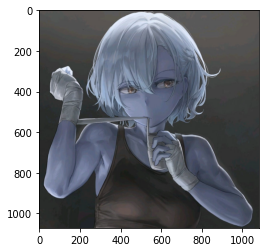

 Imagem final - GPU


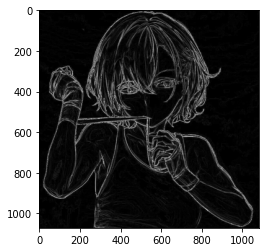

In [ ]:
showImages("image.jpg")

#Código Paralelo Cuda, segunda abordagem.

Neste código ainda estamos processando um pixel por thread. Entretanto, não estamos retornando os dados intermediários para a CPU. Assim, as imagens intermediárias não são copiadas para a CPU e são descartadas. Isso é possível, pois as imagens intermediárias ainda permanecem na GPU, então, nos próximos passos do processamento, basta informarmos o endereço da imagem intermediária na GPU.

Os eventos ocorrem da seguinte maneira:

1- CPU recebe imagem inicial.

2- Copiamos essa imagem para a GPU.

3- Alocamos memória para as imagens intermediárias na GPU.

4- Fazemos a conversão para escala de cinza.

5- Fazemos o cálculo da imagem gradiente.

6- Copiamos a imagem gradiente de volta para a CPU. 

In [ ]:
%%writefile parallelOneStep.cu
#include<iostream>
#include<cmath>
#include<opencv2/imgproc/imgproc.hpp>
#include<opencv2/highgui/highgui.hpp>
#include<cstdio>
#include<cuda_runtime.h>

using namespace std;
using namespace cv;

//using std::cout;
//using std::endl;

int blocksTest = 16;

static inline void _safe_cuda_call(cudaError err, const char* msg, const char* file_name, const int line_number)
{
	if(err!=cudaSuccess)
	{
		fprintf(stderr,"%s\n\nFile: %s\n\nLine Number: %d\n\nReason: %s\n",msg,file_name,line_number,cudaGetErrorString(err));
		std::cin.get();
		exit(EXIT_FAILURE);
	}
}

#define SAFE_CALL(call,msg) _safe_cuda_call((call),(msg),__FILE__,__LINE__)


//Kernel to  apply sobel convolution
__global__ void sobel_gradient_kernel( unsigned char* input, 
									unsigned char* output, 
									int width,
									int height,
									int graytWidthStep,
									int gradientWidthStep) 
{
	//2D Index of current thread
	const int xIndex = blockIdx.x * blockDim.x + threadIdx.x;
	const int yIndex = blockIdx.y * blockDim.y + threadIdx.y;

	//Only valid threads perform memory I/O. Obs: We ignore the border values
	if((xIndex> 0 && xIndex<width - 1) && (yIndex> 0 && yIndex<height - 1)){
		
		//Location of gradient pixel in output
		const int gradient_tid  = yIndex * gradientWidthStep + xIndex;

        //Calculate gx and gy derivatives
        float gx = (1.0/4.0)*((-3*input[( yIndex-1 )*width + ( xIndex-1 )]) +
                              (-10*input[ yIndex*width + ( xIndex-1 )]) +
                              (-3*input[( yIndex+1 )*width + ( xIndex-1 )]) +
                              (3*input[( yIndex-1 )*width + ( xIndex+1 )]) +
                              (10*input[ yIndex*width + ( xIndex+1 )]) +
                              (3*input[( yIndex+1 )*width + ( xIndex+1 )]));

        float gy = (1.0/4.0)*((3*input[( yIndex-1 )*width + ( xIndex-1 )]) +
                              (10*input[( yIndex-1 )*width + xIndex]) + 
                              (3*input[( yIndex-1 )*width + ( xIndex+1 )]) +
                              (-3*input[( yIndex+1 )*width + ( xIndex-1 )]) +
                              (-10*input[( yIndex+1 )*width + xIndex]) +
                              (-3*input[(yIndex+1)*width + ( xIndex+1 )]));

        float gradient_value = sqrt( gx*gx + gy*gy );
		//float gradient_value = gx + gy;
		output[gradient_tid] = static_cast<unsigned char>(gradient_value);      
	}
}

//Kernel to conver from RGB image to Gray
__global__ void bgr_to_gray_kernel( unsigned char* input, 
									unsigned char* output, 
									int width,
									int height,
									int colorWidthStep,
									int grayWidthStep)
{
	//2D Index of current thread
	const int xIndex = blockIdx.x * blockDim.x + threadIdx.x;
	const int yIndex = blockIdx.y * blockDim.y + threadIdx.y;

	//Only valid threads perform memory I/O
	if((xIndex<width) && (yIndex<height))
	{
		//Location of colored pixel in input
		const int color_tid = yIndex * colorWidthStep + (3 * xIndex);
		
		//Location of gray pixel in output
		const int gray_tid  = yIndex * grayWidthStep + xIndex;

		const unsigned char blue	= input[color_tid];
		const unsigned char green	= input[color_tid + 1];
		const unsigned char red		= input[color_tid + 2];

        //Equation of gray convertion
		const float gray = red * 0.2989f + green * 0.5870f + blue * 0.1140f;

		output[gray_tid] = static_cast<unsigned char>(gray);
	}
}

//Função modificada para aplicar a conversão para cinza E Aplicar o filtro de sobel
void convert_to_gray_AND_sobel_gradient_wrapper(const cv::Mat& input, cv::Mat& output){

	//Calculate total number of bytes of input and output image
	const int colorBytes = input.step * input.rows;
	const int grayBytes = output.step * output.rows;

	unsigned char *d_input, *d_output, *d_final;

	//Allocate device memory
	SAFE_CALL(cudaMalloc<unsigned char>(&d_input,colorBytes),"CUDA Malloc Failed");
	SAFE_CALL(cudaMalloc<unsigned char>(&d_output,grayBytes),"CUDA Malloc Failed");
    SAFE_CALL(cudaMalloc<unsigned char>(&d_final,grayBytes),"CUDA Malloc Failed");

	//Copy data from OpenCV input image to device memory
	SAFE_CALL(cudaMemcpy(d_input,input.ptr(),colorBytes,cudaMemcpyHostToDevice),"CUDA Memcpy Host To Device Failed");

	//Specify a reasonable block size
	const dim3 block(blocksTest,blocksTest);

	//Calculate grid size to cover the whole image
	const dim3 grid((input.cols + block.x - 1)/block.x, (input.rows + block.y - 1)/block.y);

	//Launch the color conversion kernel
	bgr_to_gray_kernel<<<grid,block>>>(d_input,d_output,input.cols,input.rows,input.step,output.step);

	//Synchronize to check for any kernel launch errors
	SAFE_CALL(cudaDeviceSynchronize(),"Kernel Launch Failed");

	//Launch the sobel & gradient kernel
	sobel_gradient_kernel<<<grid,block>>>(d_output,d_final,output.cols,output.rows,output.step,output.step); 

	//Copy back data from destination device memory to OpenCV output image
	SAFE_CALL(cudaMemcpy(output.ptr(),d_final,grayBytes,cudaMemcpyDeviceToHost),"CUDA Memcpy Host To Device Failed");

	//Synchronize to check for any kernel launch errors
	SAFE_CALL(cudaDeviceSynchronize(),"Kernel Launch Failed");

	//Free the device memory
	SAFE_CALL(cudaFree(d_input),"CUDA Free Failed");
	SAFE_CALL(cudaFree(d_output),"CUDA Free Failed");
    SAFE_CALL(cudaFree(d_final),"CUDA Free Failed");
}


int main(){
	std::string imagePath = "image.jpg";
    int experimentsNumber = 21;

    int64 time;

	//Read input image from the disk
	cv::Mat src_img = cv::imread(imagePath,CV_LOAD_IMAGE_COLOR);

	if(src_img.empty()){
		std::cout<<"Image Not Found!"<<std::endl;
		std::cin.get();
		return -1;
	}

    for(int i = 0; i < experimentsNumber; i++){
        //Start clock
        time = getTickCount();

        //Create final image (with the structure of a gray one)
        cv::Mat gray_img_gpu(src_img.rows,src_img.cols,CV_8UC1);

        //Call the wrapper function to convert to gray
        convert_to_gray_AND_sobel_gradient_wrapper(src_img, gray_img_gpu);

        //End clock
        time = getTickCount() - time;
        printf("Parallel execution time = %g ms\n", time*1000/getTickFrequency()); 

        //Ignore first execution, because it is an outlier and will affect the results  
        if(i == 0){}
        else{
            //Writing results on file for latter processing
            FILE * pFile;
            pFile = fopen("parallelTime-test2.txt", "a"); 
            fprintf(pFile, " %g", time*1000/getTickFrequency());
            fclose(pFile);
        }
        imwrite("parallelSobel.jpg", gray_img_gpu);
    }
	return 0;
}

Overwriting parallelOneStep.cu


In [ ]:
!nvcc parallelOneStep.cu -o parallelOneStep -I /usr/local/include/opencv  `pkg-config --cflags --libs opencv` -run

Parallel execution time = 151.157 ms
Parallel execution time = 2.30952 ms
Parallel execution time = 2.23083 ms
Parallel execution time = 2.3309 ms
Parallel execution time = 2.17359 ms
Parallel execution time = 2.49081 ms
Parallel execution time = 2.24937 ms
Parallel execution time = 2.14231 ms
Parallel execution time = 2.18574 ms
Parallel execution time = 2.18599 ms
Parallel execution time = 2.21664 ms
Parallel execution time = 2.25341 ms
Parallel execution time = 2.13701 ms
Parallel execution time = 2.15081 ms
Parallel execution time = 2.15792 ms
Parallel execution time = 2.1408 ms
Parallel execution time = 2.15083 ms
Parallel execution time = 2.31728 ms
Parallel execution time = 2.29228 ms
Parallel execution time = 2.14173 ms
Parallel execution time = 2.16229 ms


 Imagem inicial - Resolução 1071x1080


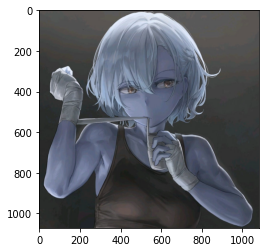

 Imagem final - GPU


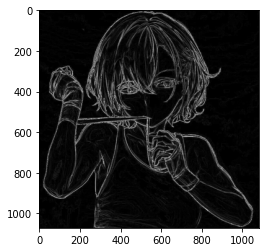

In [ ]:
showImages("image.jpg")

#Resultados

Os três códigos acima foram executados 20 vezes para 9 imagens com resoluções distintas. Os resultados estão disponíveis na pasta de "results" que será disponibilizada juntamente com este documento. Então, antes de executar o código abaixo, faça o upload de todos os arquivos presente na pasta "results". Abaixo será realizada a leitura dos resultados, o cálculo da média das 20 execuções e a plotagem dos gráficos.

In [ ]:
from statistics import mean 

sequential_values = []
parallel_values_approach1 = []
parallel_values_approach2 = []

#Calcula a média dos 20 experimentos para cada imagem
for i in range (1,10):
    filename_seq = "sequentialTime-Image" + str(i) + ".txt"
    sequentialTemp = readValuesFromFile(filename_seq)
    sequential_values.append(mean(sequentialTemp))

    filename_parallel = "parallelTime-Image" + str(i) + ".txt"
    parallelTemp = readValuesFromFile(filename_parallel)
    parallel_values_approach1.append(mean(parallelTemp))

    filename_parallel_2 = "parallelTime-Image" + str(i) + "-Abordagem2.txt"
    parallelTemp_2 = readValuesFromFile(filename_parallel_2)
    parallel_values_approach2.append(mean(parallelTemp_2))

image_resolutions = ['1080x1071', '2209x1558', '4280x3484', '3712x5568', '6000x4000', '6240x4160', '8370x4000', '8315x5130', '10000x6618']


#Gráficos

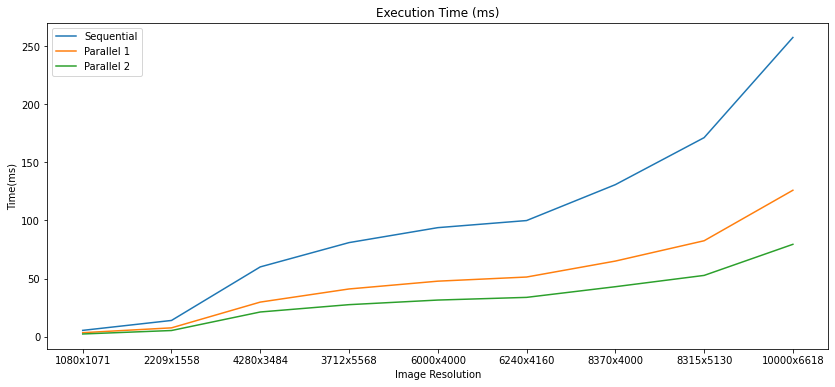

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
  
# x axis values 
x_axis = image_resolutions

# corresponding y axis values 
# sequential_values 
# parallel_values_approach1
# parallel_values_approach2
  
# plotting the points  
plt.plot(x_axis, sequential_values, label = "Sequential")
plt.plot(x_axis, parallel_values_approach1, label = "Parallel 1")
plt.plot(x_axis, parallel_values_approach2, label = "Parallel 2")
  
# naming the x axis 
plt.xlabel('Image Resolution') 
# naming the y axis 
plt.ylabel('Time(ms)') 
  
# giving a title to my graph 
plt.title('Execution Time (ms)') 

# show a legend on the plot
plt.legend()

# function to show the plot 
plt.show() 

Agora vamos calcular o speedup do algoritmos paralelos 1 e 2.

In [ ]:
speedup_approach1 = []
speedup_approach2 = []

#Vamos percorrer a lista que contém os resultados e calcularemos sequencial/paralelo para obter o speedup.
for i in range(0, len(sequential_values)):
    spTemp1 = sequential_values[i]/parallel_values_approach1[i]
    spTemp2 = sequential_values[i]/parallel_values_approach2[i]

    speedup_approach1.append(spTemp1)
    speedup_approach2.append(spTemp2)


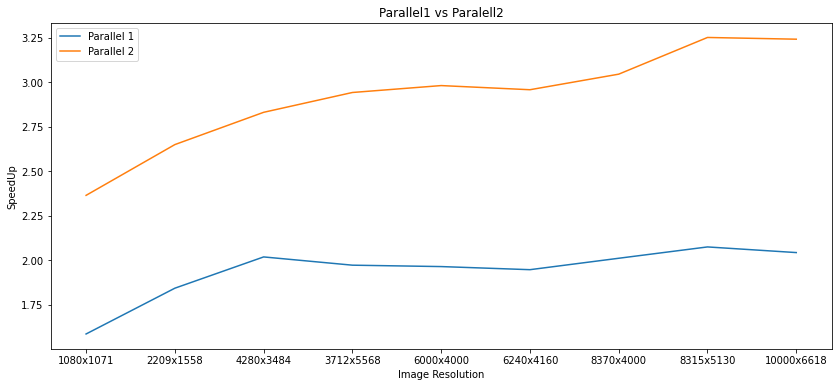

In [ ]:
# x axis values 
x_axis = image_resolutions

# corresponding y axis values 
# speedup_approach1
# speedup_approach2
  
# plotting the points  
plt.plot(x_axis, speedup_approach1, label = "Parallel 1")
plt.plot(x_axis, speedup_approach2, label = "Parallel 2")
  
# naming the x axis 
plt.xlabel('Image Resolution') 
# naming the y axis 
plt.ylabel('SpeedUp') 
  
# giving a title to my graph 
plt.title('Parallel1 vs Paralell2') 

# show a legend on the plot
plt.legend()

# function to show the plot 
plt.show() 

#Referências:

http://programmerfish.com/how-to-write-a-custom-cuda-kernel-with-opencv-as-host-library/

http://www.nvidia.com/docs/io/116711/sc11-cuda-c-basics.pdf

https://stackoverflow.com/a/35621962/6207953

https://gist.github.com/jirihnidek/3f23b7451c1744d71dbf

https://answers.opencv.org/question/110726/sobel-edge-detection-implementation/

https://docs.opencv.org/3.2.0/d2/d2c/tutorial_sobel_derivatives.html

https://github.com/lukas783/CUDA-Sobel-Filter/blob/master/sobelFilter.cu

https://developer.download.nvidia.com/compute/cuda/1.1-Beta/x86_website/projects/convolutionSeparable/doc/convolutionSeparable.pdf

https://forums.developer.nvidia.com/t/how-to-decide-the-optimal-block-size-in-cuda/14906/4

https://github.com/evlasblom/cuda-opencv-examples/blob/master/src/invert_2.cu

https://stackoverflow.com/questions/44174092/how-to-multiply-two-opencv-matrices-in-a-kernel-function-in-cuda

https://docs.nvidia.com/cuda/cuda-c-best-practices-guide/index.html


**Fontes das imagens:**

https://gratisography.com/

https://unsplash.com/

https://konachan.net/

